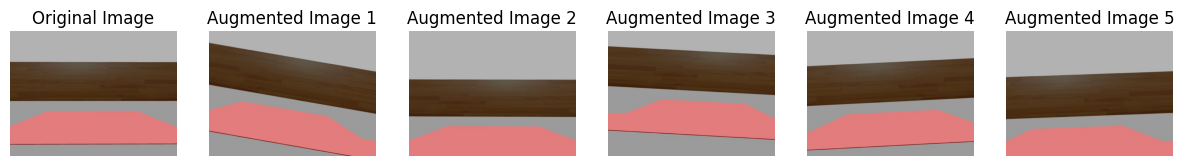

In [6]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import matplotlib.pyplot as plt

def load_and_convert_image(image_path):
    bgr_image = cv2.imread(image_path)
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    rgb_image = tf.image.convert_image_dtype(rgb_image, tf.float32)
    return rgb_image

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

def augment_image(image, num_augments=5):
    image = tf.expand_dims(image, axis=0)
    augmented_images = []
    for _ in range(num_augments):
        augmented_image = datagen.flow(image, batch_size=1)[0]
        augmented_images.append(tf.squeeze(augmented_image, axis=0))
    return augmented_images

def visualize_augmentation(original_image, augmented_images):
    fig, axes = plt.subplots(1, len(augmented_images) + 1, figsize=(15, 5))
    axes[0].imshow(original_image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    for i, aug_img in enumerate(augmented_images):
        axes[i + 1].imshow(aug_img)
        axes[i + 1].set_title(f'Augmented Image {i+1}')
        axes[i + 1].axis('off')

    plt.show()

# Example usage with an image from a path
image_path = '/content/original_image.png'
example_image = load_and_convert_image(image_path)

# Generate multiple augmented images
num_augments = 5
augmented_images = augment_image(example_image, num_augments)

# Visualize the original and augmented images
visualize_augmentation(example_image, augmented_images)

In [9]:
example_image.shape

TensorShape([480, 640, 3])